<a href="https://colab.research.google.com/github/al00pes/Homologacao_sprint_II/blob/main/Homo_MVP_Sprint_ll_Arthur_Lopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



>**MVP Sprint II - Arthur Lopes:**

**Introdução**

Bob abriu sua própria empresa de telefonia móvel. Ele quer lutar duramente contra grandes empresas como Apple, Samsung etc.

Ele não sabe estimar o preço dos celulares que sua empresa cria. Neste competitivo mercado de telefonia móvel, você não pode simplesmente assumir as coisas. Para resolver esse problema, ele coleta dados de vendas de telefones celulares de várias empresas.

Bob quer descobrir alguma relação entre as características de um telefone celular (por exemplo:- RAM, memória interna, etc.) e seu preço de venda. Mas ele não é tão bom em Machine Learning. Então ele precisa de sua ajuda para resolver este problema.

Neste problema, você não precisa prever o preço real, mas uma faixa de preço que indica quão alto é o preço

**Colunas**

Battery_power = Energia total que uma bateria pode armazenar em um tempo medido em mAh

Blue = Tem bluetooth ou não

clock_speed = velocidade na qual o microprocessador executa instruções

dual_sim = Tem suporte para dois chip ou não

FC = Mega Pixels da câmera frontal

four_g = Tem suporte a 4G ou não

int_memory = Memoria internal em Gb

m_dep = Profundida do celular em CM

Mobile_wt = Peso do celular

n_cores = Numeros de nucleos do processador

PC = Mega Pixels em câmera digital

px_height = Tamanho da resolução dos pixels

px_width = Largura da resolução do pixels

ram = Memoria de acesso aleatório em Mb

sc_h = Altura da tela do celular em cm

sc_w = Largura da tela do celular em CM

talk_time = Tempo maximo que a bateria suporte somente com uma carga

three_g = Tem 3g ou não

touch_screen = Possui touch screen ou não

wifi = Possui wifi ou não











In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder # para transformar atributos categóricos em numéricos
from sklearn.preprocessing import StandardScaler # para padronização dos atributos
from sklearn.preprocessing import MinMaxScaler # para normalização dos atributos
from sklearn.model_selection import train_test_split # para aplicação do holdout
from sklearn.model_selection import KFold # para preparar os folds de validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Carregando o dataset e transformando em um dataframe

df = pd.read_csv('mobile_train.csv')
#exibindo apenas as 5 primeiras linhas do dataframe
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# Exibindo as 5 ultimas linhas 
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [4]:
#Informaçao do dataset
#Mostra que possui 23921 linhas e 25 colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#Verificando se existe algum valor nulo 
#Nenhuma coluna possui valor nulo

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
#Verificando se existe linha duplicadas
#Obs: O '.sum()' no final serve para fazer a soma de quantas linhas duplicadas existem no dataset
df.duplicated().sum()

0

In [7]:
#Verificando os valores de cada coluna oara verificar se existe outliers
#outliers são dados que se diferenciam drasticamente de todo os outros
#São valores que fonde da normalidade
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

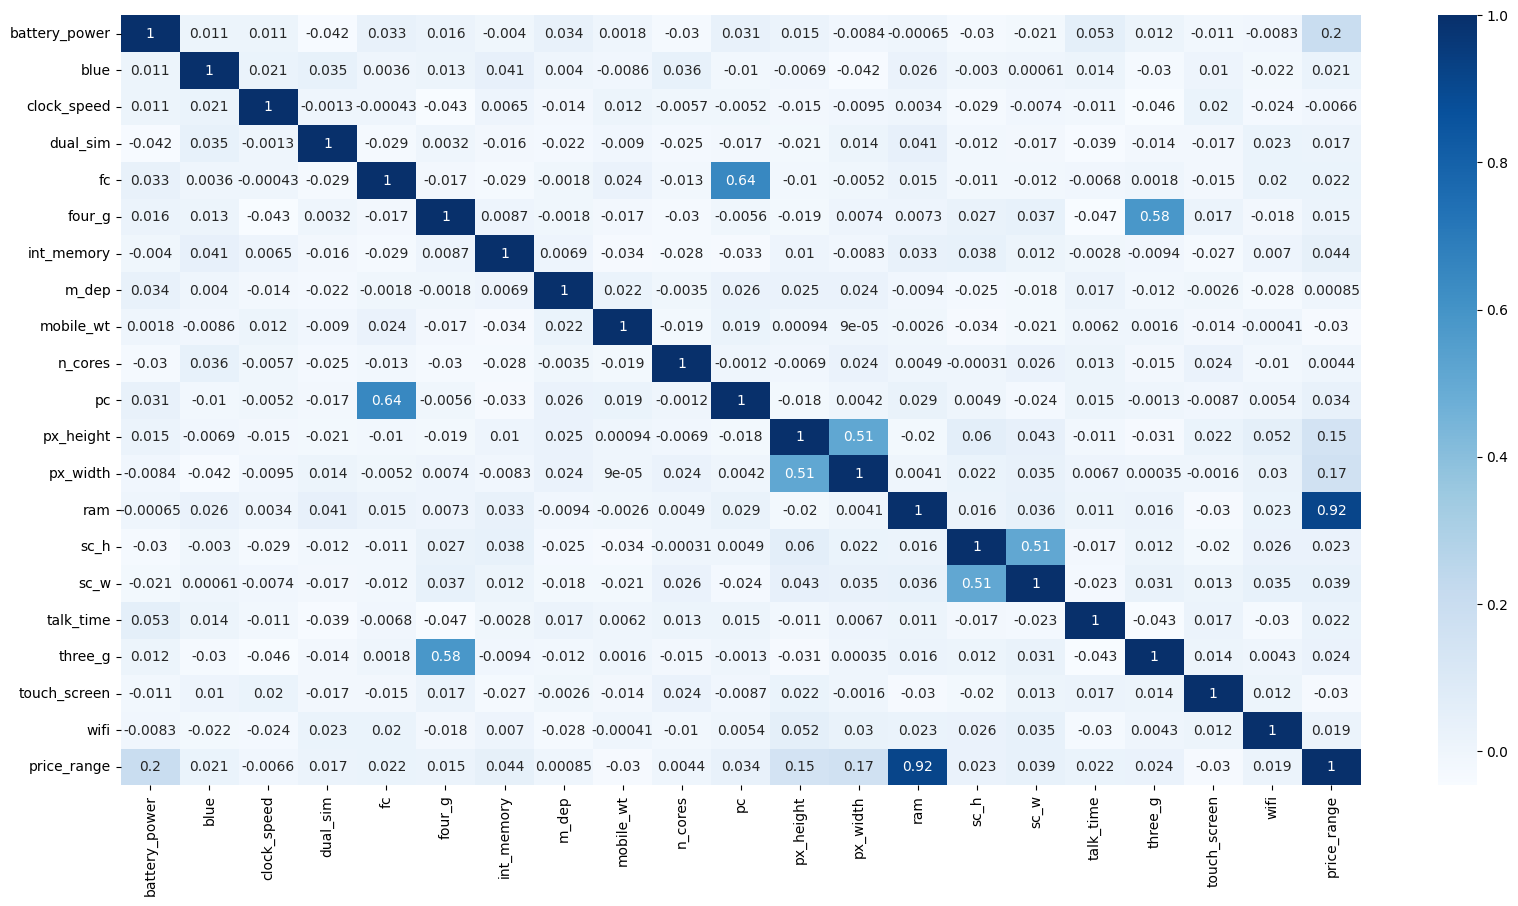

In [8]:
#Mostrando a correlação entre as colunas
plt.figure(figsize = (20,10)) #Alterando tamanho da imagem
sns.heatmap(df.corr(), annot = True, cmap = 'Blues') # annot = True , mostra os valores / #cmap = 'Blues', muda a cor do grafico
#Com esse grafico consigo perceber que esse uma correlação em 'Memoria Ram e o Price do Celular ( que é o alvo para ser alcançado")


In [9]:
#Verificando as variações categoricas 
#com o FOR , consigo verificar a variação de valroes de cada coluna
for c in df.columns:
  print(f"{c}: {df[c].nunique()}")

battery_power: 1094
blue: 2
clock_speed: 26
dual_sim: 2
fc: 20
four_g: 2
int_memory: 63
m_dep: 10
mobile_wt: 121
n_cores: 8
pc: 21
px_height: 1137
px_width: 1109
ram: 1562
sc_h: 15
sc_w: 19
talk_time: 19
three_g: 2
touch_screen: 2
wifi: 2
price_range: 4


In [14]:
#Separação das colunas entre categoricas e numericas
categoricas = [ 'blue','dual_sim', 'four_g','n_cores','touch_screen','wifi','three_g']
numericas = ['battery_power', 'clock_speed', 'int_memory','mobile_wt','m_dep','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','fc']

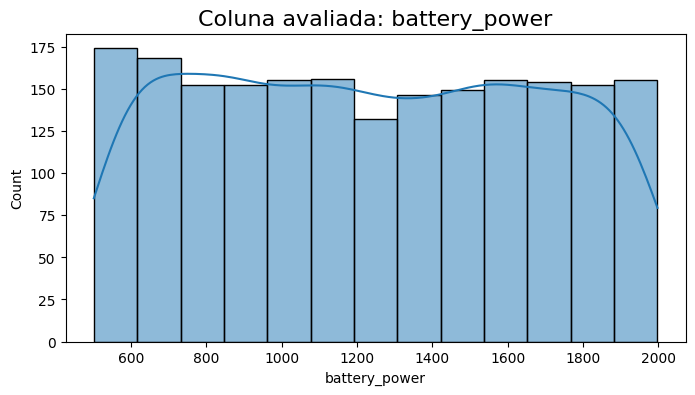

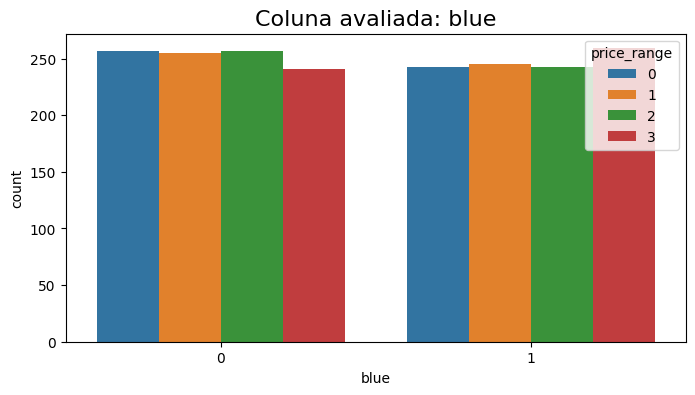

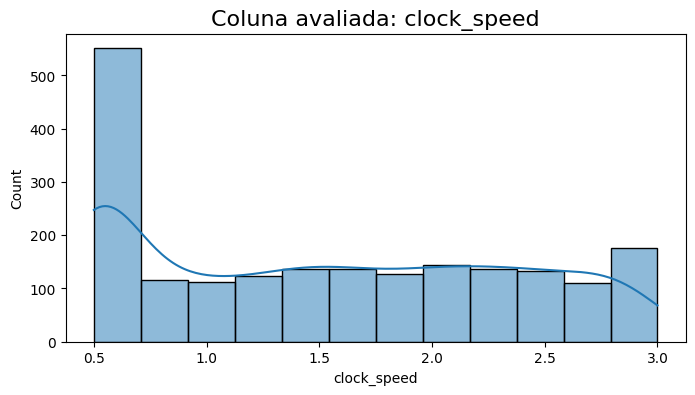

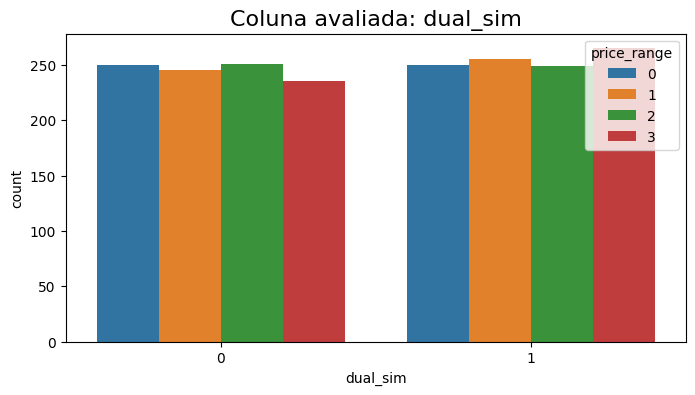

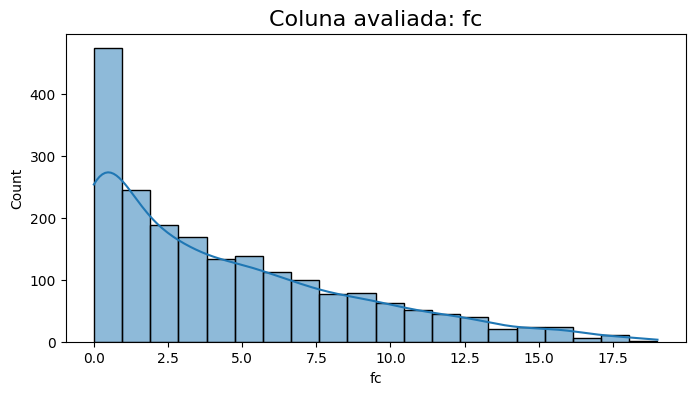

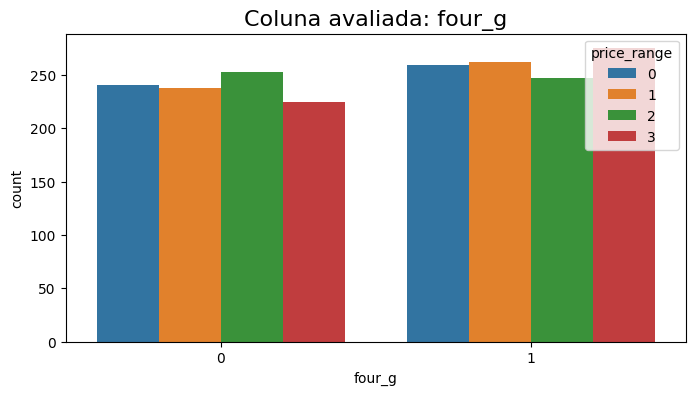

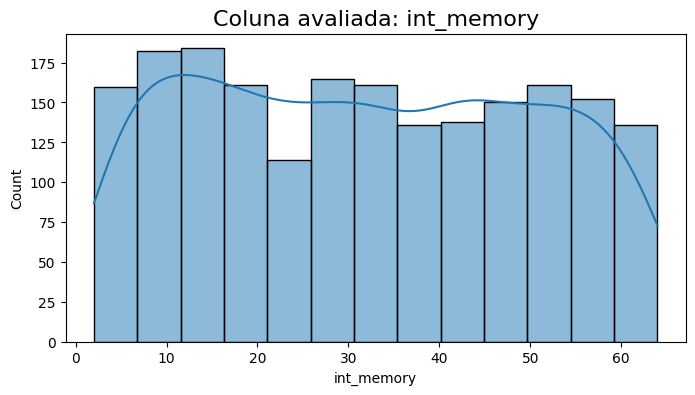

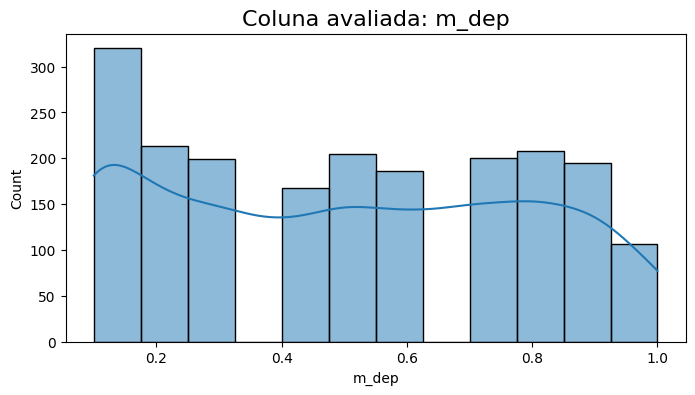

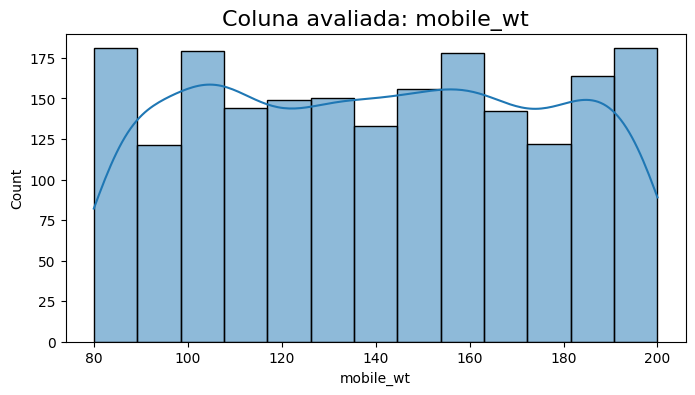

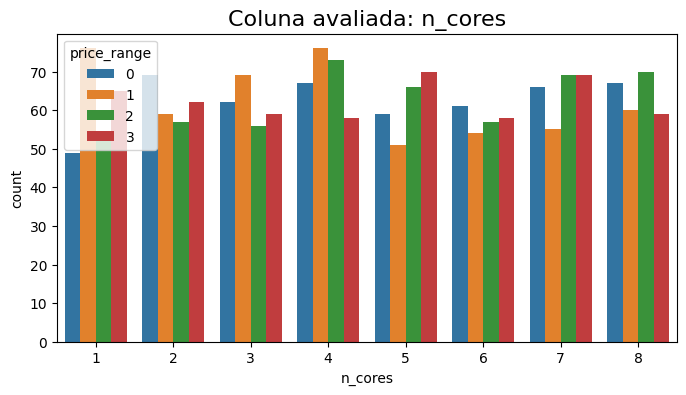

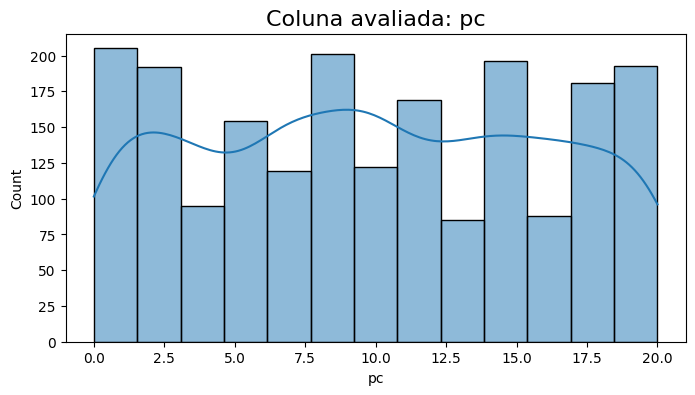

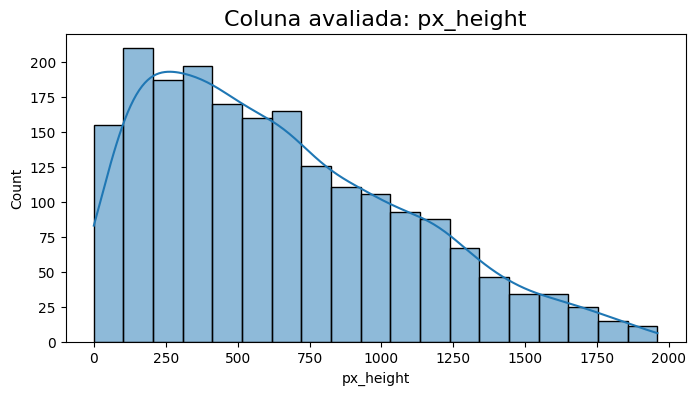

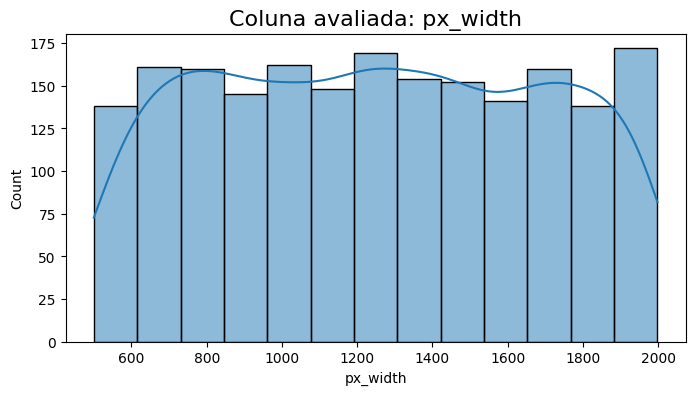

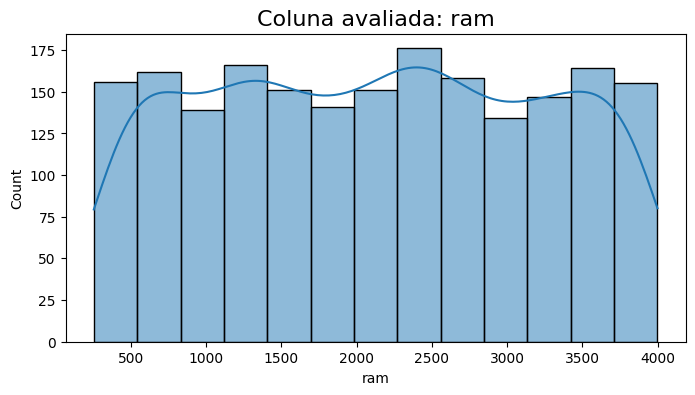

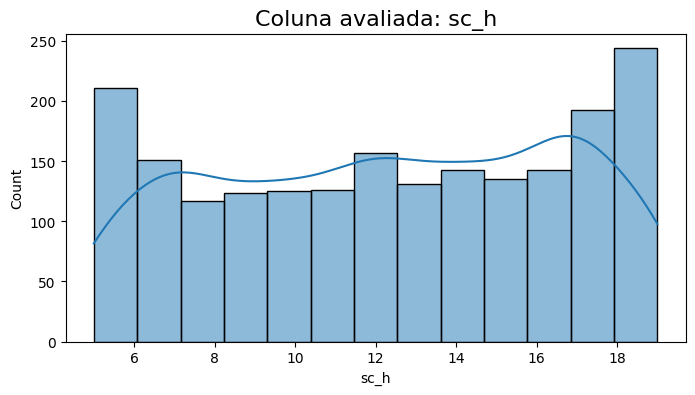

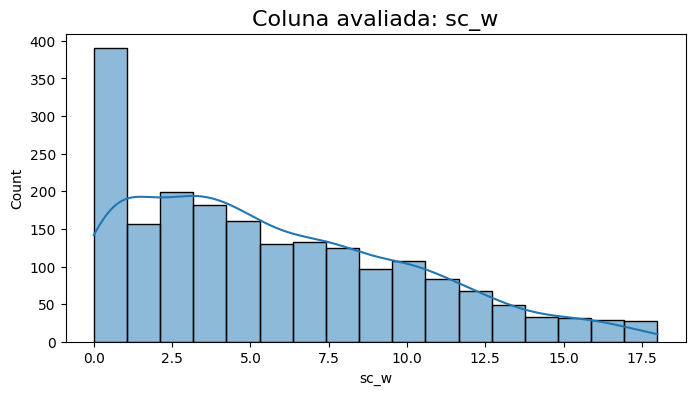

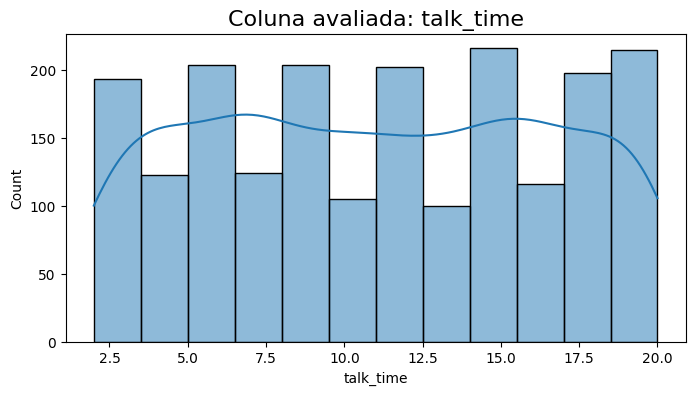

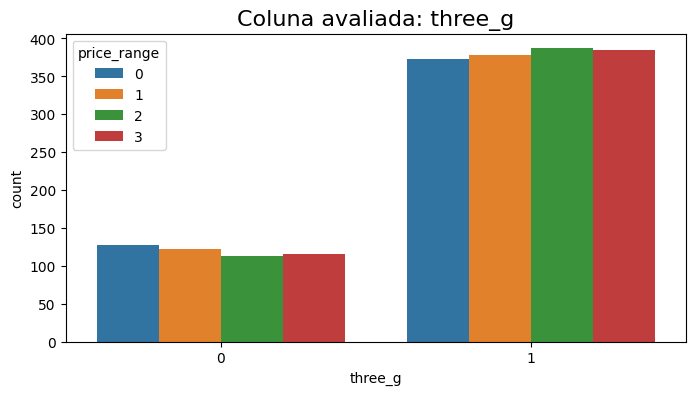

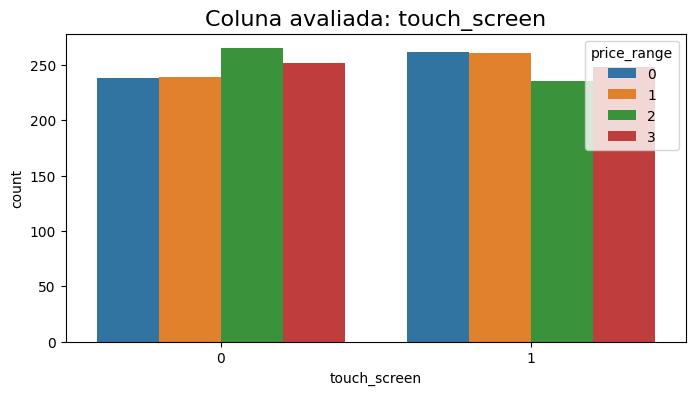

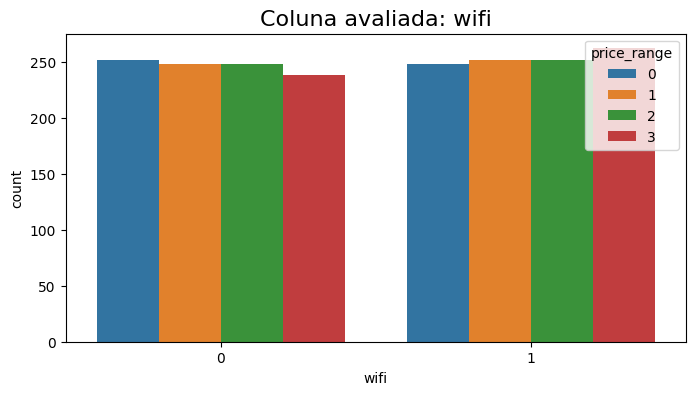

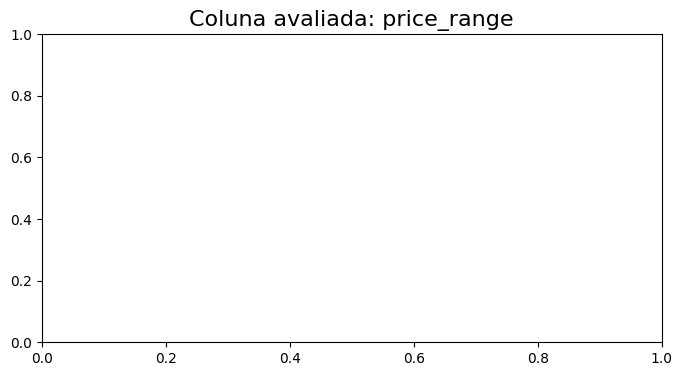

In [15]:
#Gerando graficos e histogramas 
#utilzando FOR novamente

for c in df.columns:
  plt.figure(figsize = (8,4))
  plt.title(f"Coluna avaliada: {c}", fontsize= 16)
  if c in categoricas:
    sns.countplot(x = df[c], hue = df['price_range'])
  if c in numericas:
    sns.histplot(df[c], kde = True)

In [16]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Removendo os outliers 


<Axes: >

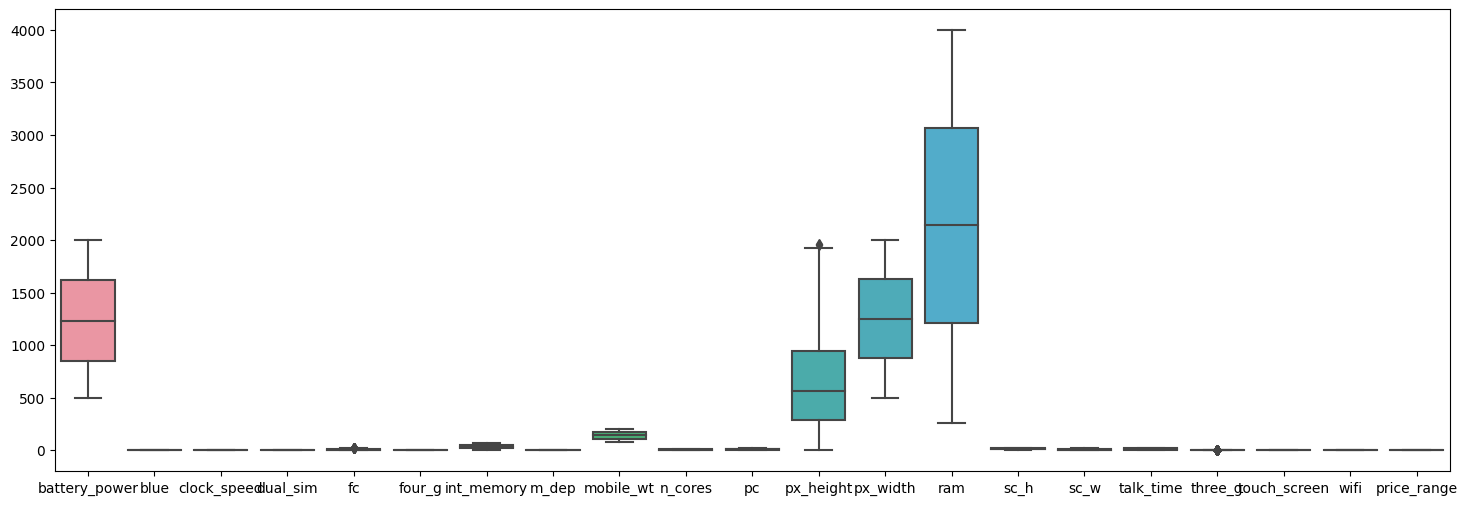

In [28]:
# Essa é mais uma grafico que é possível verificar a variação de valores que está ocorrendo
plt.figure(figsize = (18, 6))
sns.boxplot( data = df)

In [30]:
#Calcando a porcentagem de 1% para retirar outliers da coluna 'px_height'
df['px_height'].quantile(0.99)


1791.01

In [31]:
#Criando um novo dataframe com a remoção do outliers
df1 = df[df['px_height'] < df['px_height'].quantile(0.99)]

<Axes: >

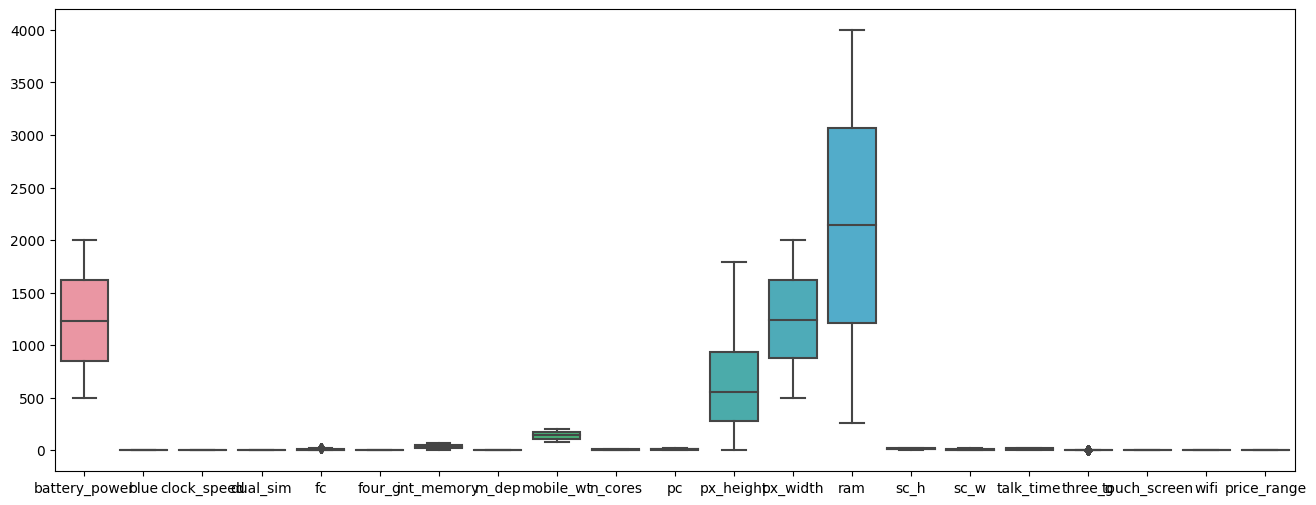

In [32]:
#Verificar se a remoção de 1% foi possivel acabar com os outliers
plt.figure(figsize = (16,6))
sns.boxplot(data = df1)

In [33]:
df1.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,...,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,1238.031818,0.495455,1.522222,0.510606,4.303030,0.519697,32.018182,0.501162,140.287374,4.519192,...,632.789394,1244.595455,2125.563636,12.295455,5.752525,11.005051,0.760606,0.501010,0.505556,1.495960
std,439.355914,0.500106,0.815917,0.500014,4.334788,0.499738,18.138975,0.288369,35.415269,2.283614,...,428.631681,428.806602,1085.033094,4.211570,4.350645,5.467990,0.426821,0.500125,0.500095,1.118761
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,280.000000,874.000000,1209.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,556.000000,1242.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,935.000000,1617.250000,3069.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1791.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Ponto de observação:

- Até esse momento foi feito apenas a parte de pre-processamento e normalização do dataset.



In [34]:
# Separação em bases de treino e teste ( holdout)

array = df1.values

X = array[:,0:20] #Atributos
y = array[:,20] # Classe ( price_mobile)

**Utilizando o Feature selection para determinar os melhores atributos a seres utilizando no algoritmos de ML**

In [37]:
#SelectKBest

#Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selcionados
features = fit.transform(X)

#Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

#Exibe os atributos originais
print("\nAtributos Originais:", df1.columns[0:20])

#Exibe as pontuações de cada atributo e os 4 escolhidos ( com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df1.columns[0:20]))




Número original de atributos: 20

Número reduzido de atributos: 4

Atributos Originais: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

Scores dos Atributos originais: [3.039e+01 5.259e-01 5.305e-01 4.393e-01 6.862e-01 7.648e-01 2.820e+00
 1.583e+00 3.355e+00 2.446e+00 7.197e-01 1.878e+01 2.187e+01 3.557e+03
 2.461e+00 1.844e+00 1.755e+00 4.744e-01 1.493e+00 2.439e-01]

Atributos Selecionados: ['battery_power' 'px_height' 'px_width' 'ram']


In [42]:
#Eliminação Recursiva de Atributos

#Criação do modelo 

modelo = LogisticRegression(max_iter=200)

#Eliminação Recursiva de atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

#Print dos resultados
print("Atributos Originais:", df1.columns[0:20])

#Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
#e com valor 1 em "Ranking dos Atributos")

print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQuantidade de atributos: %s" % fit.n_features_)
print("\nNomes dos atributos selecionados: %s" % fit.get_feature_names_out(input_features=df1.columns[0:20]))

Atributos Originais: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

Atributos Selecionados: [False False False False False  True False  True False False False False
 False False False False False  True  True False]

Ranking de atributos: [17  2  5  3 10  1 12  1 13  6 11 15 16 14  7  8  9  1  1  4]

Quantidade de atributos: 4

Nomes dos atributos selecionados: ['four_g' 'm_dep' 'three_g' 'touch_screen']


In [44]:
#importancia de Atributos com ExtraTrees

#Criação do modelo para seleção de 
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X, y)

# Exibe os atributos originais
print("\nAtributos originais:",df1.columns[0:20])

#Exibe a pontuação de importancia para cada atributo ( quanto maior a pontuação , mais importante é o atributo).
print(modelo.feature_importances_)


Atributos originais: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
[0.06  0.02  0.036 0.02  0.033 0.018 0.037 0.034 0.038 0.034 0.034 0.048
 0.049 0.38  0.035 0.035 0.036 0.015 0.017 0.022]
